<center>
  <h1 style="font-family: 'Times New Roman', Times, serif; font-size: 60px;">DAA</h1>
  <h2 style="font-family: 'Times New Roman', Times, serif; font-size: 40px;">Data Exploration and Descriptive Statistics After Pre-Processing</h2>
</center>

<h3 style="font-family: 'Times New Roman'">Import Libraries</h3>

In [1]:
# Import necessary libraries
import pandas as pd              # Import pandas for data manipulation and analysis
import numpy as np               # Import numpy for numerical computations
import matplotlib.pyplot as plt  # Import matplotlib for data visualization
import seaborn as sns            # Import seaborn for enhanced data visualization
from sklearn.feature_selection import mutual_info_classif

<h3 style="font-family: 'Times New Roman'">Load Dataset After PreProcessing</h3>

In [2]:
df = pd.read_csv('Files/Pre_Processing/Smoking.csv')

<h3 style="font-family: 'Times New Roman'">Data Exploration After Pre-Processing</h3>

In [3]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame
le = LabelEncoder()

# Encode 'blood_pressure' column
df['blood_pressure'] = le.fit_transform(df['blood_pressure'])

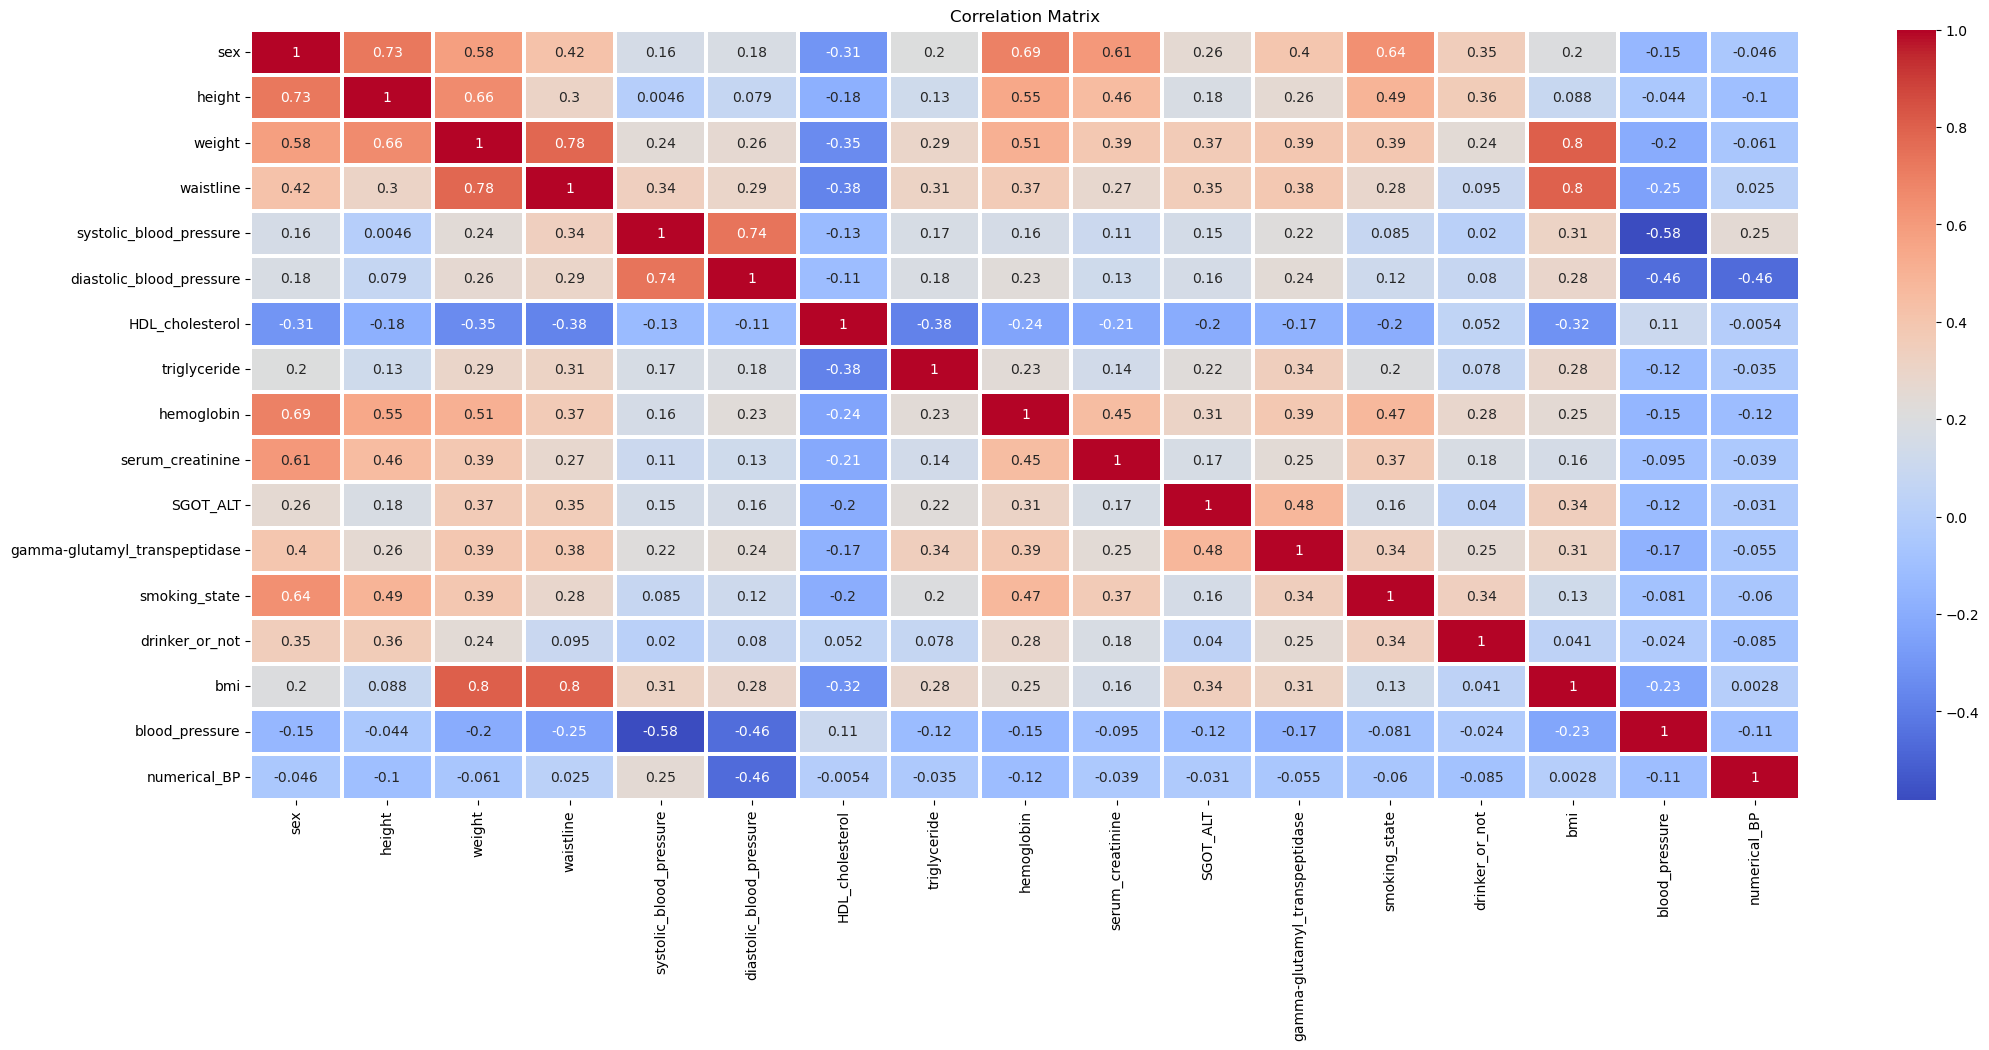

In [4]:
# Calculate the correlation matrix for the DataFrame
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlations with annotations
plt.figure(figsize=(25, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=1.5)
plt.title("Correlation Matrix")
plt.show()

In [5]:
target_smoking = df['smoking_state']

# Drop the target columns from the features
features = df.drop(['smoking_state'], axis=1)

# Calculate mutual information for each feature with respect to the target variables
mi_smoking = mutual_info_classif(features, target_smoking, discrete_features='auto', random_state=42)

# Create DataFrames to show the results
mi_results_smoking = pd.DataFrame({'Feature': features.columns, 'Mutual_Information_Smoking': mi_smoking})

# Display the results
print(mi_results_smoking.sort_values(by='Mutual_Information_Smoking', ascending=False))

                          Feature  Mutual_Information_Smoking
0                             sex                    0.233432
13                            bmi                    0.152621
1                          height                    0.145590
8                      hemoglobin                    0.133416
2                          weight                    0.082126
9                serum_creatinine                    0.081263
11  gamma-glutamyl_transpeptidase                    0.077131
12                 drinker_or_not                    0.062960
3                       waistline                    0.044807
7                    triglyceride                    0.024829
10                       SGOT_ALT                    0.024206
6                 HDL_cholesterol                    0.016436
15                   numerical_BP                    0.007917
14                 blood_pressure                    0.007186
4         systolic_blood_pressure                    0.006479
5       

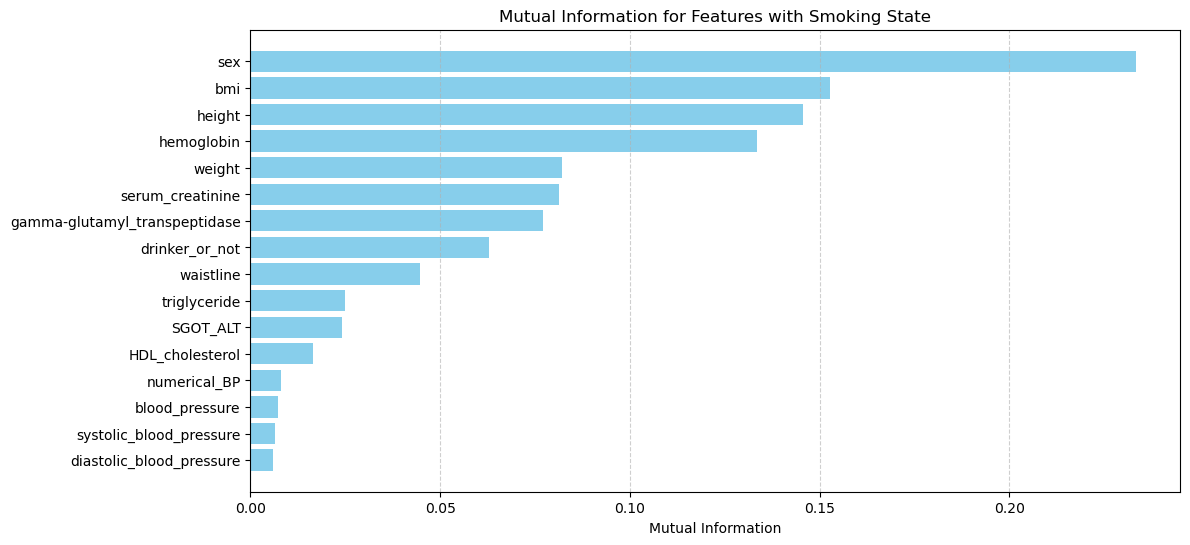

In [6]:
# Order the features by mutual information for 'smoking_state'
sorted_mi_smoking = mi_results_smoking.sort_values(by='Mutual_Information_Smoking', ascending=False)

# Plot for 'smoking_state'
plt.figure(figsize=(12, 6))
plt.barh(sorted_mi_smoking['Feature'], sorted_mi_smoking['Mutual_Information_Smoking'], color='skyblue')
plt.xlabel('Mutual Information')
plt.title('Mutual Information for Features with Smoking State')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

<h3 style="font-family: 'Times New Roman'">Descriptive Statistics After Pre-Processing</h3>

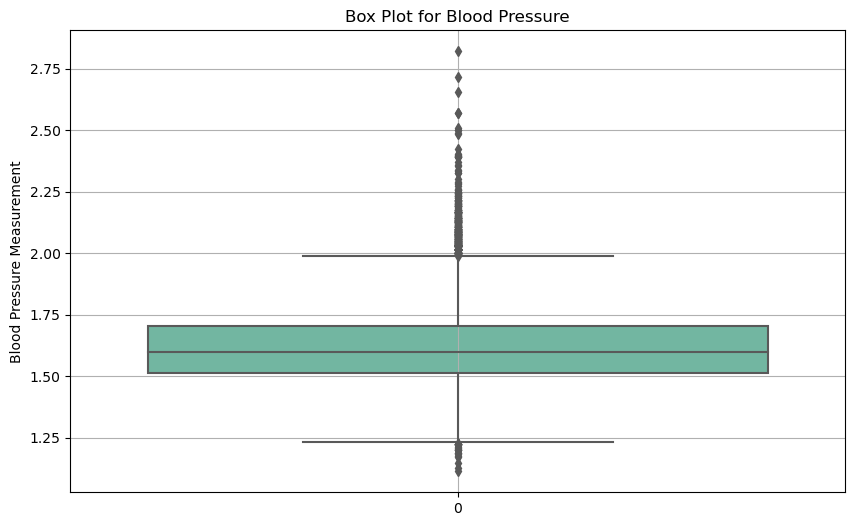

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['numerical_BP'], palette='Set2')
plt.title('Box Plot for Blood Pressure')
plt.ylabel('Blood Pressure Measurement')
plt.grid(True)
plt.show()

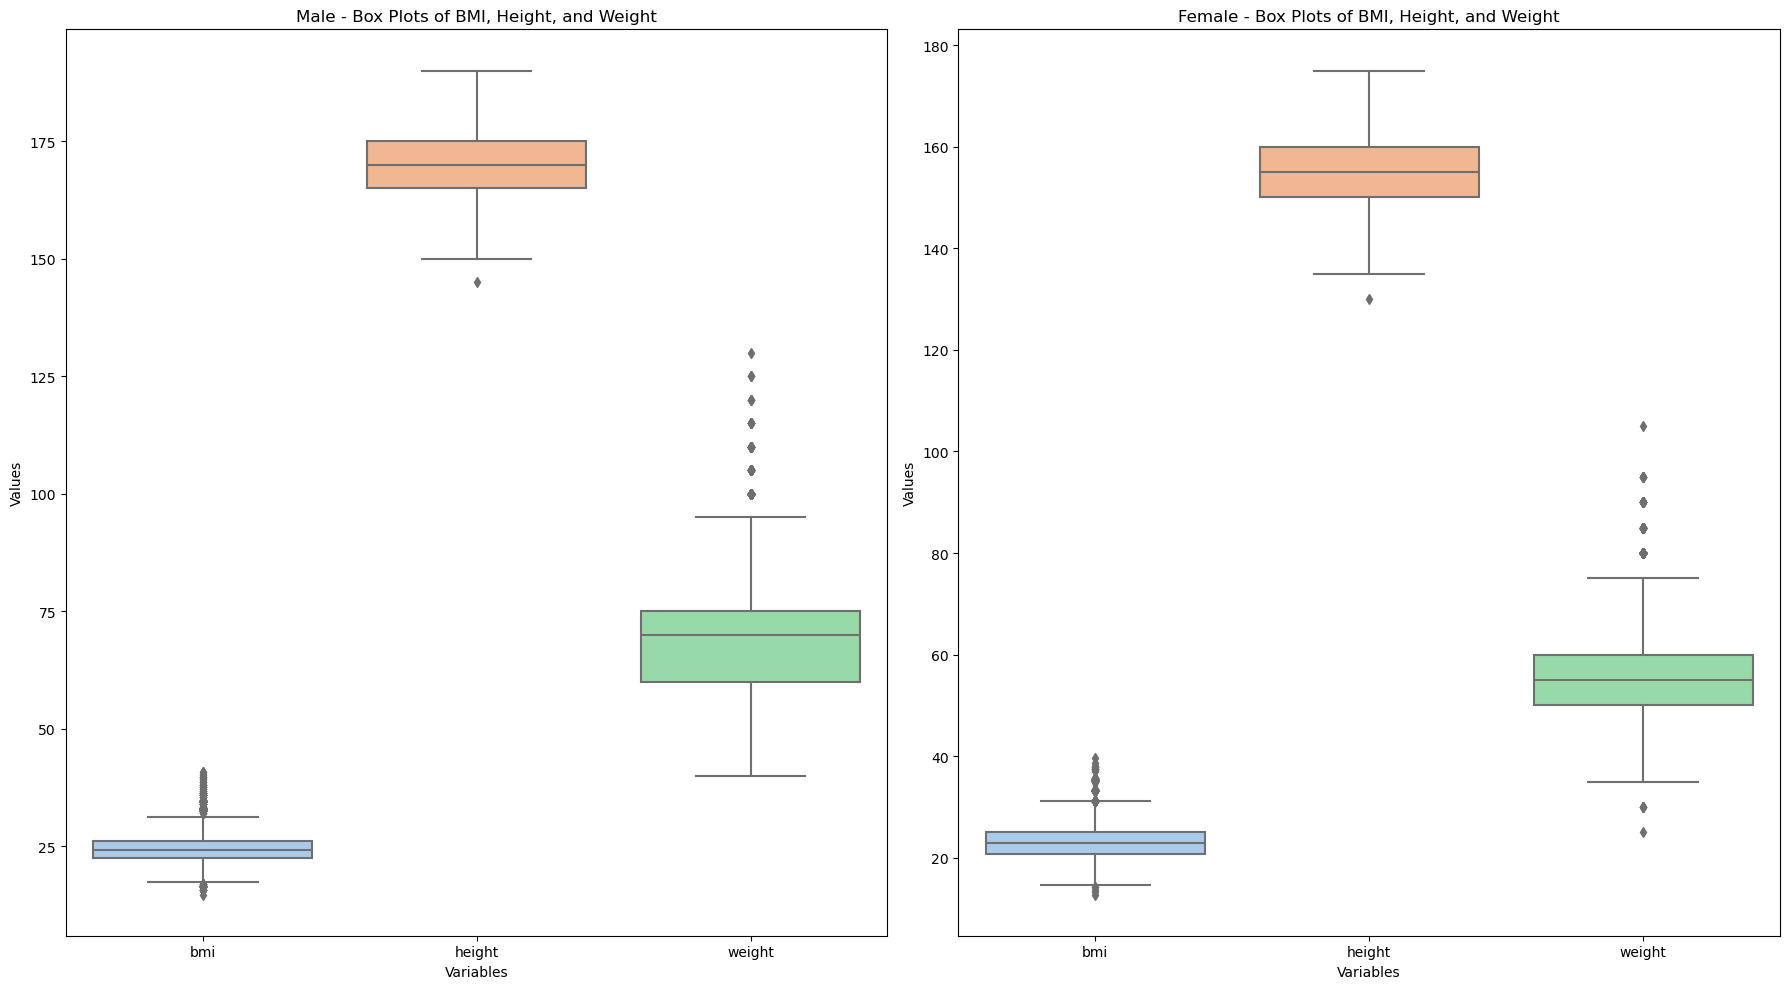

In [8]:
# Filter DataFrame for male (sex=1)
male_df = df[df['sex'] == 1]

# Create box plots for male (excluding 'age')
plt.figure(figsize=(18, 10))
plt.subplot(1, 2, 1)
sns.boxplot(x='variable', y='value', data=pd.melt(male_df[['bmi', 'height', 'weight', 'sex']], id_vars='sex'), palette='pastel')
plt.title('Male - Box Plots of BMI, Height, and Weight')
plt.xlabel('Variables')
plt.ylabel('Values')

# Filter DataFrame for female (sex=0)
female_df = df[df['sex'] == 0]

# Create box plots for female (excluding 'age')
plt.subplot(1, 2, 2)
sns.boxplot(x='variable', y='value', data=pd.melt(female_df[['bmi', 'height', 'weight', 'sex']], id_vars='sex'), palette='pastel')
plt.title('Female - Box Plots of BMI, Height, and Weight')
plt.xlabel('Variables')
plt.ylabel('Values')

plt.tight_layout()
plt.show()

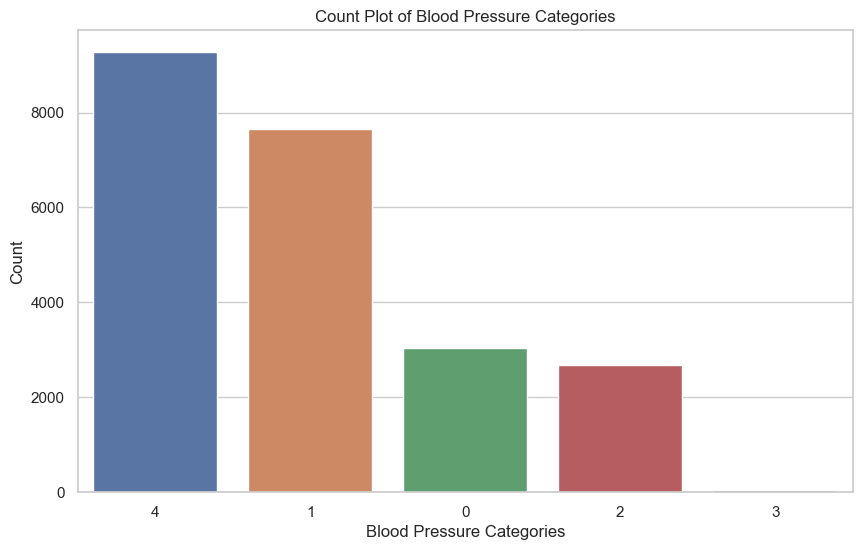

In [9]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='blood_pressure', data=df, order=df['blood_pressure'].value_counts().index)
plt.xlabel('Blood Pressure Categories')
plt.ylabel('Count')
plt.title('Count Plot of Blood Pressure Categories')
plt.show()

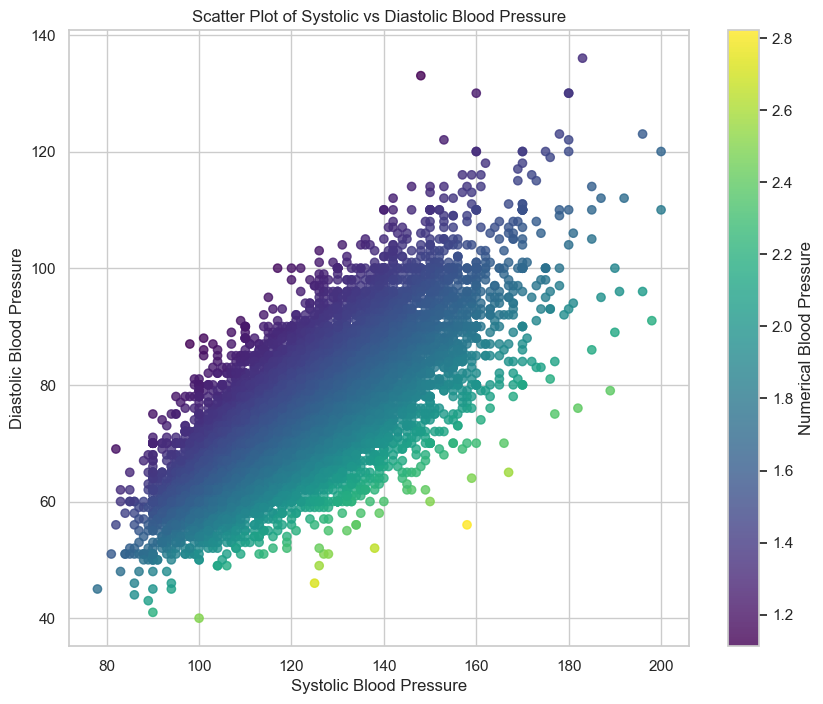

In [10]:
# Create a scatter plot
plt.figure(figsize=(10, 8))
scatter_plot = plt.scatter(df['systolic_blood_pressure'], df['diastolic_blood_pressure'], c=df['numerical_BP'], cmap='viridis', alpha=0.8)

# Add colorbar
plt.colorbar(scatter_plot, label='Numerical Blood Pressure')

# Set labels and title
plt.xlabel('Systolic Blood Pressure')
plt.ylabel('Diastolic Blood Pressure')
plt.title('Scatter Plot of Systolic vs Diastolic Blood Pressure')

plt.show()

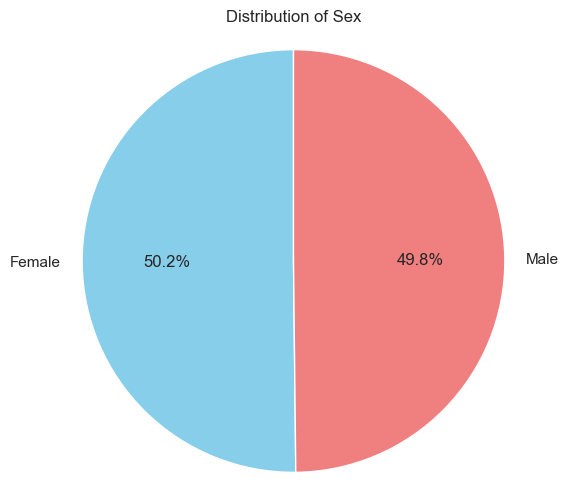

In [11]:
sex_counts = df['sex'].value_counts()

plt.figure(figsize=(6, 6))
labels = ['Female', 'Male']
colors = ['skyblue', 'lightcoral']
plt.pie(sex_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sex')
plt.axis('equal') 
plt.show()

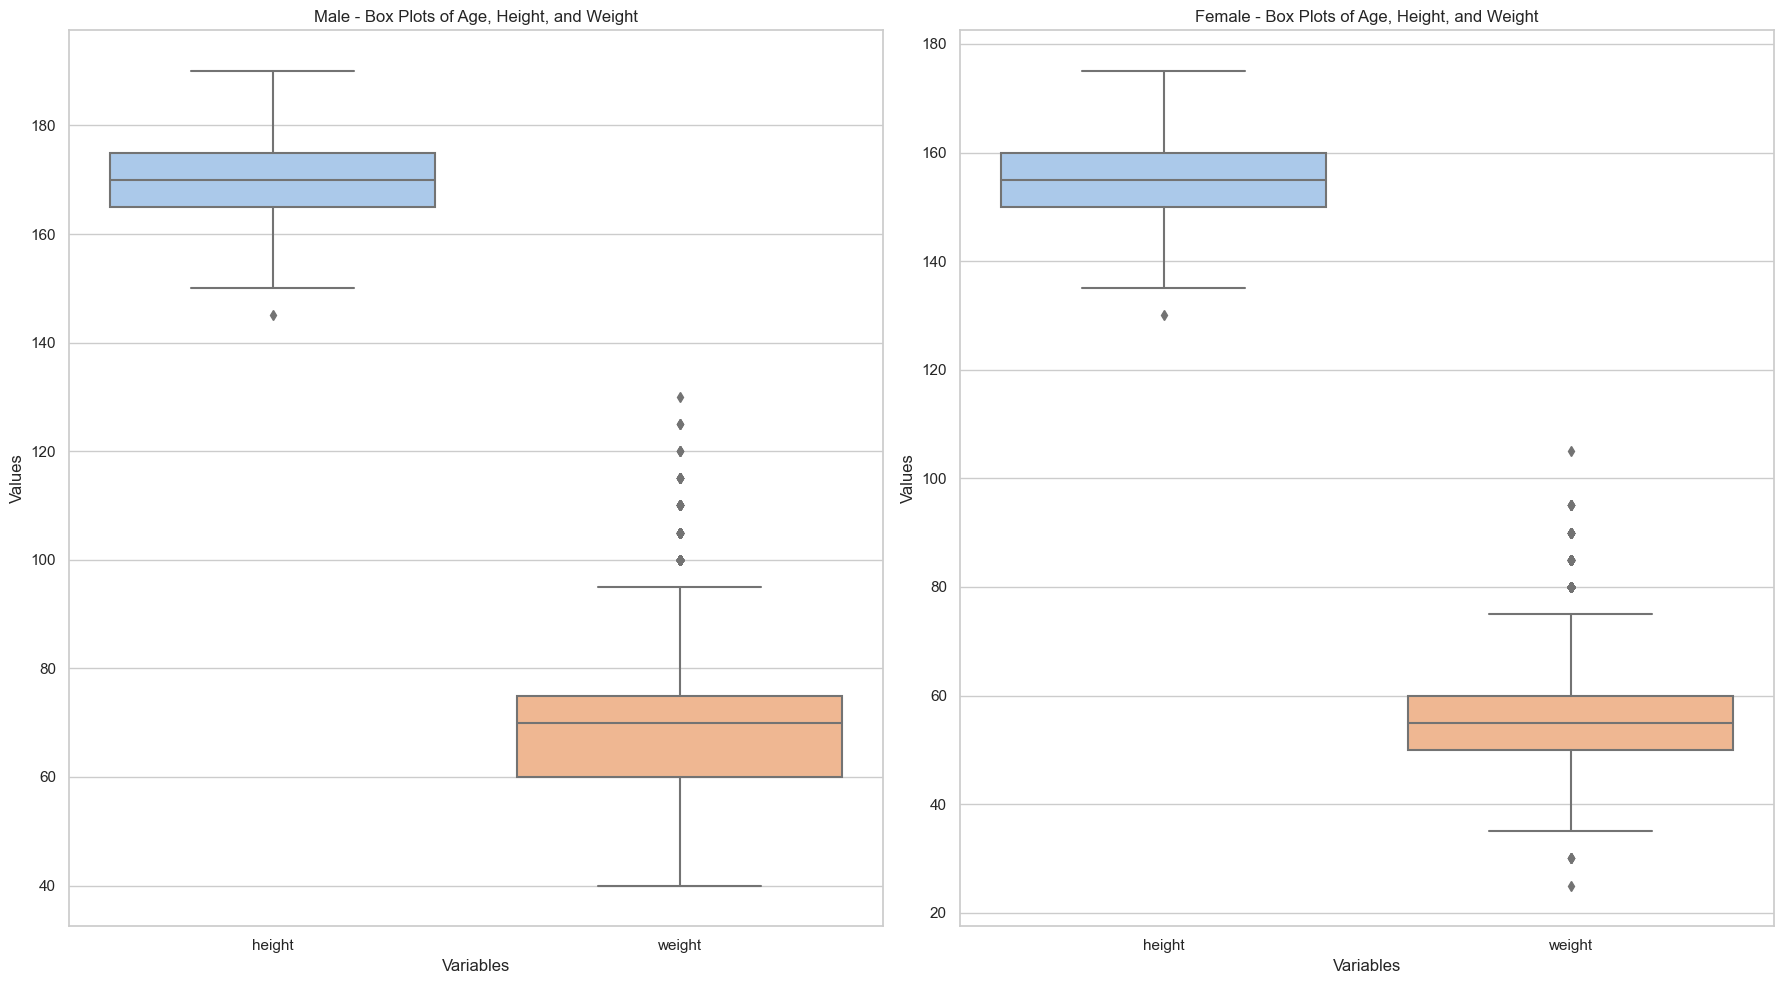

In [12]:
# Filter DataFrame for male (sex=1)
male_df = df[df['sex'] == 1]

# Create box plots for male
plt.figure(figsize=(18, 10))
plt.subplot(1, 2, 1)
sns.boxplot(x='variable', y='value', data=pd.melt(male_df[['height', 'weight', 'sex']], id_vars='sex'), palette='pastel')
plt.title('Male - Box Plots of Age, Height, and Weight')
plt.xlabel('Variables')
plt.ylabel('Values')

# Filter DataFrame for female (sex=0)
female_df = df[df['sex'] == 0]

# Create box plots for female
plt.subplot(1, 2, 2)
sns.boxplot(x='variable', y='value', data=pd.melt(female_df[['height', 'weight', 'sex']], id_vars='sex'), palette='pastel')
plt.title('Female - Box Plots of Age, Height, and Weight')
plt.xlabel('Variables')
plt.ylabel('Values')

plt.tight_layout()
plt.show()

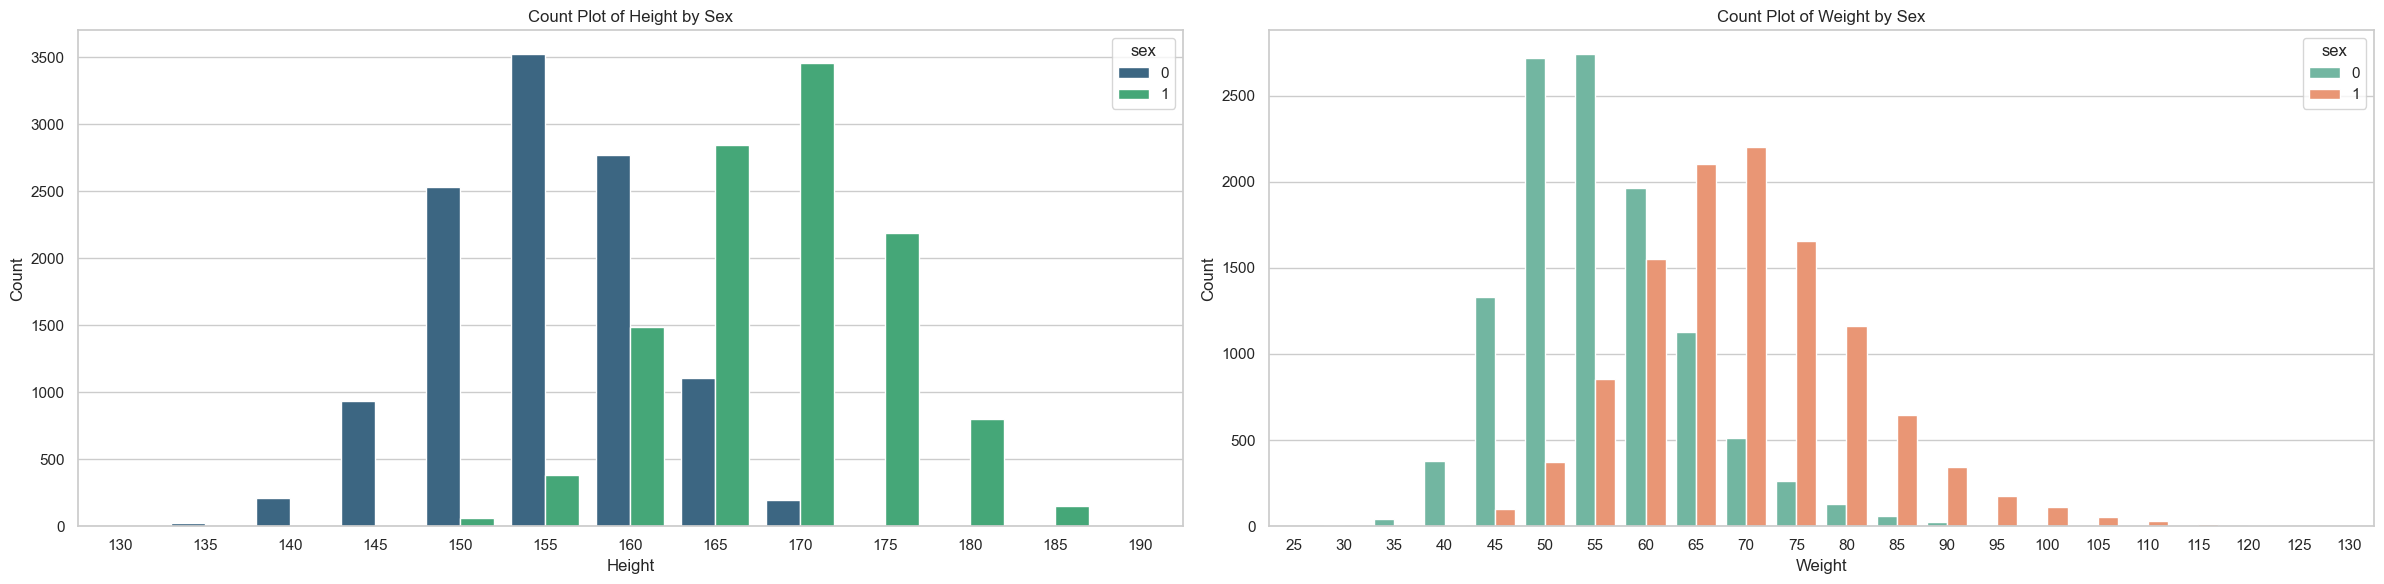

In [13]:
# Set up a 1x3 grid for subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

# Plot the first count plot
sns.countplot(x='height', hue='sex', data=df, palette='viridis', ax=axes[0])
axes[0].set_title('Count Plot of Height by Sex')
axes[0].set_xlabel('Height')
axes[0].set_ylabel('Count')

# Plot the third count plot
sns.countplot(x='weight', hue='sex', data=df, palette='Set2', ax=axes[1])
axes[1].set_title('Count Plot of Weight by Sex')
axes[1].set_xlabel('Weight')
axes[1].set_ylabel('Count')

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plots
plt.show()

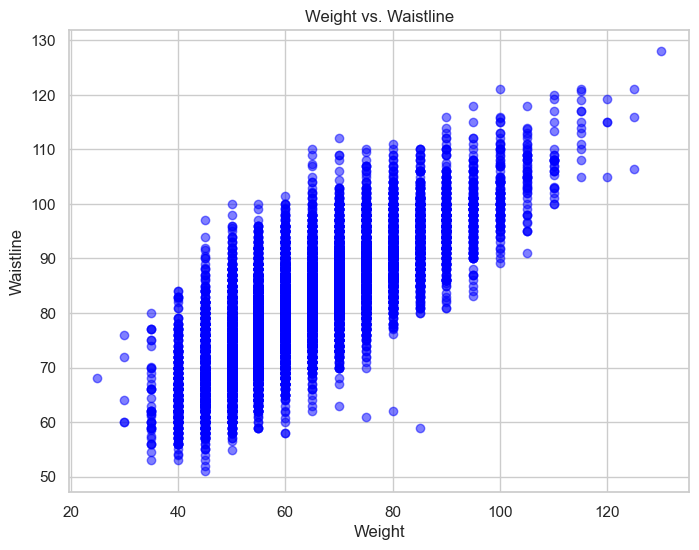

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(df['weight'], df['waistline'], alpha=0.5, c='blue')
plt.title('Weight vs. Waistline')
plt.xlabel('Weight')
plt.ylabel('Waistline')
plt.grid(True)
plt.show()

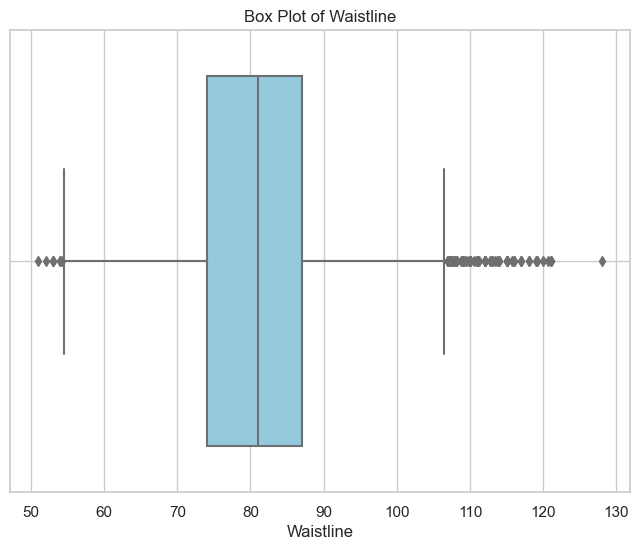

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['waistline'], color='skyblue')
plt.title('Box Plot of Waistline')
plt.xlabel('Waistline')
plt.grid(True)
plt.show()

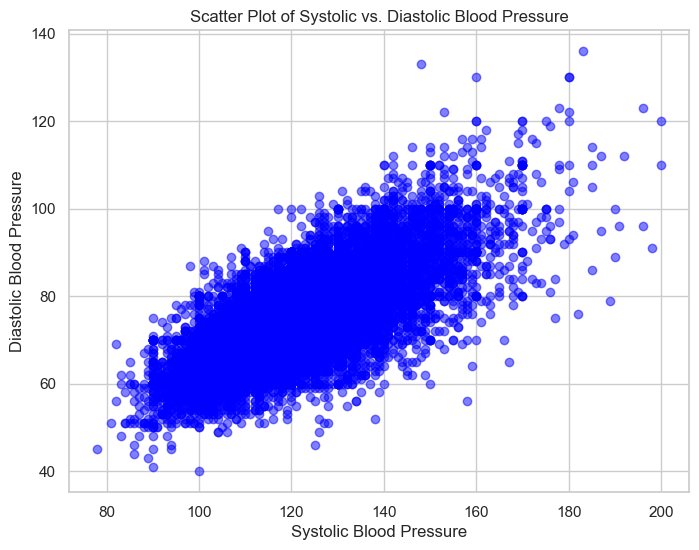

In [16]:
# Create a scatter plot to visualize the relationship between 'systolic_blood_pressure' and 'diastolic_blood_pressure'
plt.figure(figsize=(8, 6))
plt.scatter(df['systolic_blood_pressure'], df['diastolic_blood_pressure'], alpha=0.5, c='blue')
plt.title('Scatter Plot of Systolic vs. Diastolic Blood Pressure')
plt.xlabel('Systolic Blood Pressure')
plt.ylabel('Diastolic Blood Pressure')
plt.grid(True)
plt.show()

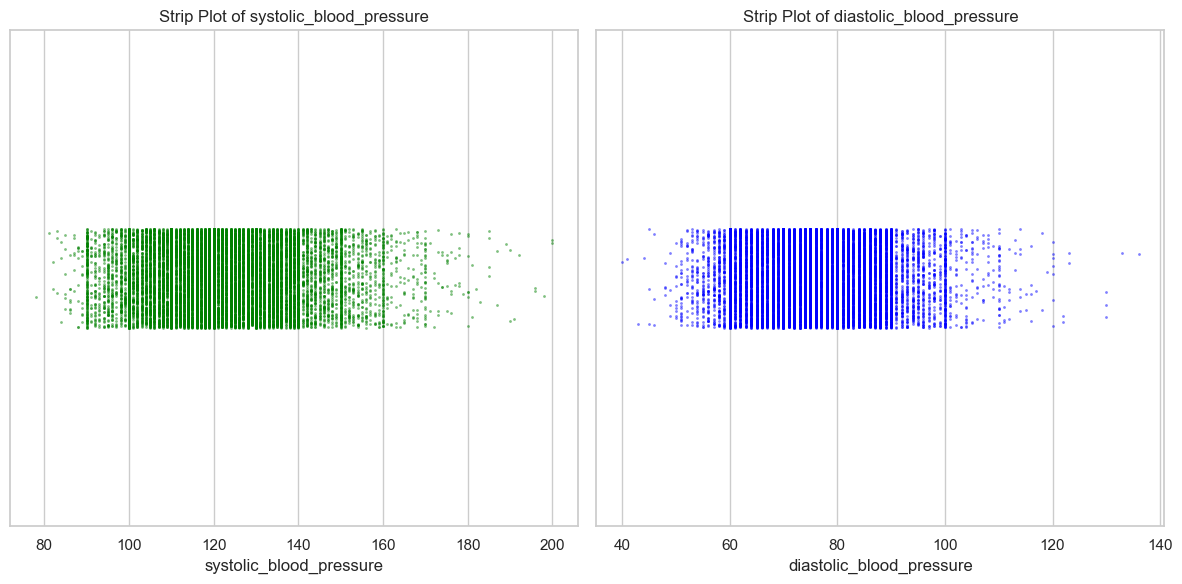

In [17]:
variable_name1 = 'systolic_blood_pressure'
variable_name2 = 'diastolic_blood_pressure'

# Create a combined plot with two strip plots
plt.figure(figsize=(12, 6))

# First Strip Plot
plt.subplot(1, 2, 1)
sns.stripplot(x=df[variable_name1], color='green', size=2, alpha=0.5)
plt.title(f'Strip Plot of {variable_name1}')
plt.xlabel(f'{variable_name1}')

# Second Strip Plot
plt.subplot(1, 2, 2)
sns.stripplot(x=df[variable_name2], color='blue', size=2, alpha=0.5)  # Change color if desired
plt.title(f'Strip Plot of {variable_name2}')
plt.xlabel(f'{variable_name2}')

plt.tight_layout()
plt.show()

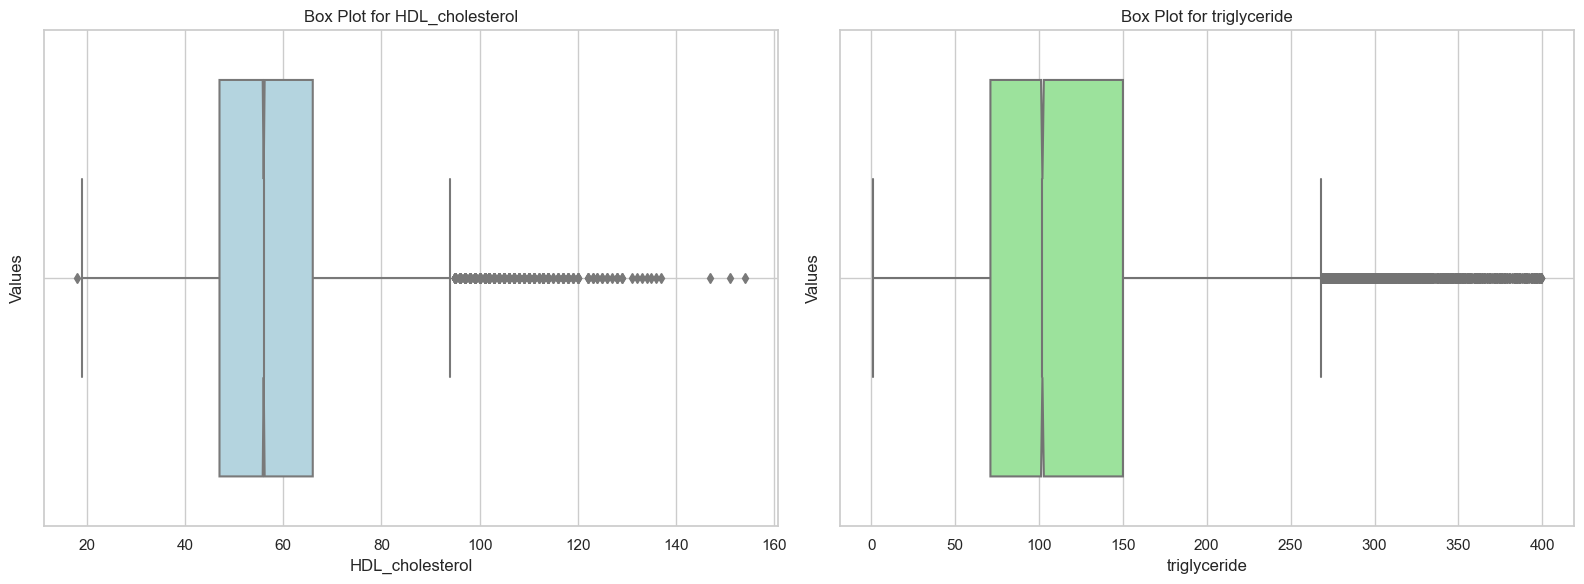

In [18]:
# Variables
variable_names = ['HDL_cholesterol', 'triglyceride']
colors = ['lightblue', 'lightgreen']  # Specify colors for each variable

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot boxplots side by side
for i, (variable_name, color) in enumerate(zip(variable_names, colors)):
    aux = df[df[variable_name] < 400]
    sns.boxplot(x=aux[variable_name], color=color, notch=True, ax=axes[i])
    axes[i].set_xlabel(variable_name)
    axes[i].set_ylabel('Values')
    axes[i].set_title(f'Box Plot for {variable_name}')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

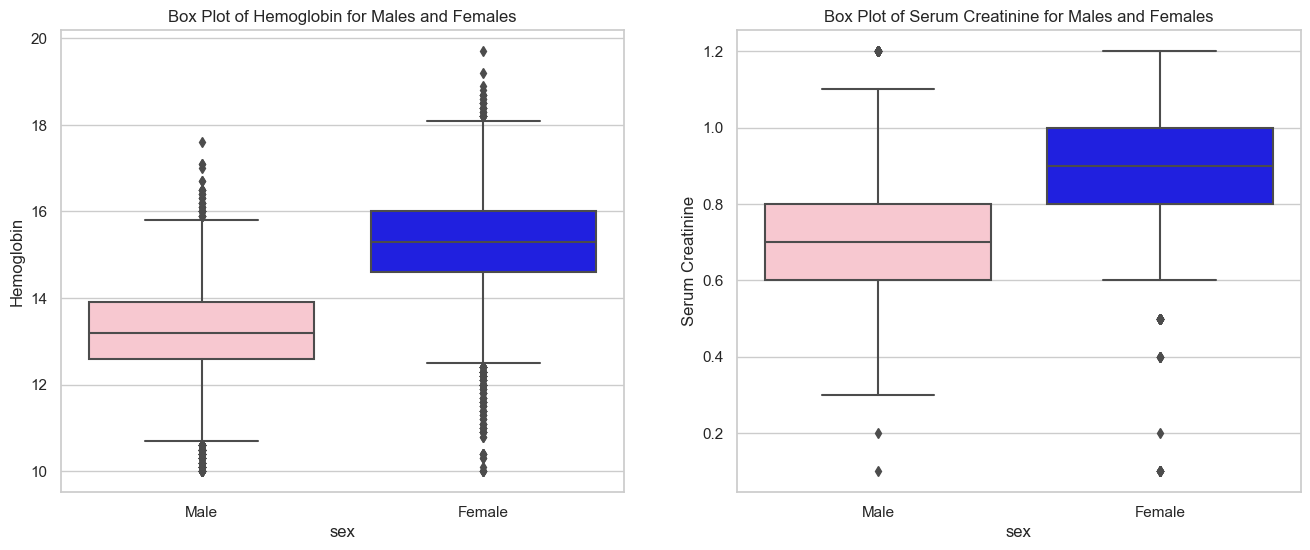

In [19]:
# Create separate DataFrames for male and female data
male_data = df[df['sex'] == 1]
female_data = df[df['sex'] == 0]

# Set up subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Box plot for 'hemoglobin'
sns.boxplot(x='sex', y='hemoglobin', data=df, palette={0: "pink", 1: "blue"}, ax=axes[0])
axes[0].set_title('Box Plot of Hemoglobin for Males and Females')
axes[0].set_ylabel('Hemoglobin')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Male', 'Female'])

# Box plot for 'serum_creatinine'
sns.boxplot(x='sex', y='serum_creatinine', data=df, palette={0: "pink", 1: "blue"}, ax=axes[1])
axes[1].set_title('Box Plot of Serum Creatinine for Males and Females')
axes[1].set_ylabel('Serum Creatinine')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Male', 'Female'])

plt.show()

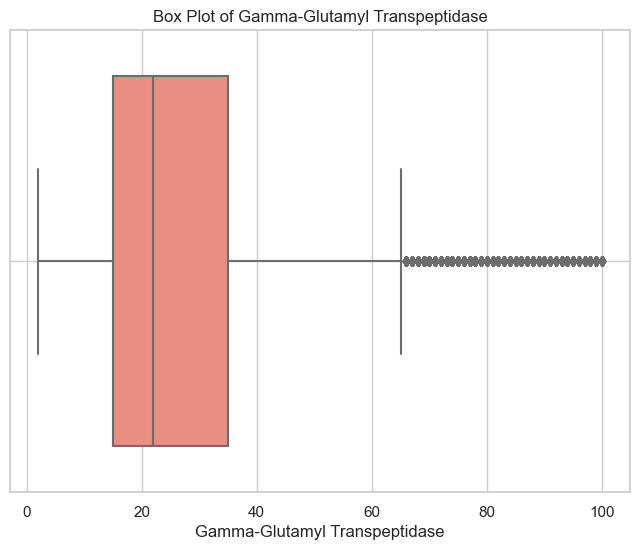

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['gamma-glutamyl_transpeptidase'],color='salmon')
plt.title('Box Plot of Gamma-Glutamyl Transpeptidase')
plt.xlabel('Gamma-Glutamyl Transpeptidase')
plt.grid(True)
plt.show()


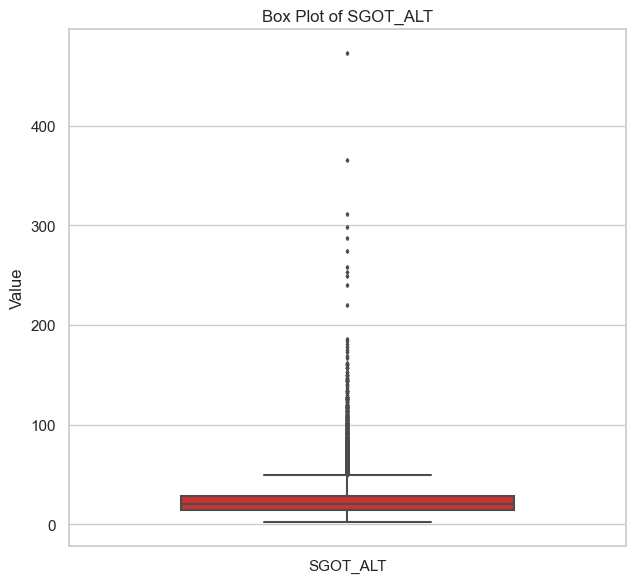

In [21]:
# Create a figure with two subplots side by side
plt.figure(figsize=(18, 6))

# Subplot 1: Box plot of 'SGOT_ALT'
plt.subplot(1, 3, 1)
sns.boxplot(data=df[['SGOT_ALT']], palette='Set1', width=0.6, fliersize=2)
plt.title('Box Plot of SGOT_ALT')
plt.ylabel('Value')
plt.xticks([0], ['SGOT_ALT'])

# Adjust subplot layout for better presentation
plt.tight_layout()
plt.show()

<h3 style="font-family: 'Times New Roman'">Save Dataset</h3>

In [22]:
df = df.to_csv('Files/Exploration_and_Stats_AfterPP/Smoking.csv', index = False)